In [10]:
#Importing the libraries
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [8]:
pip install tensorflow

  Using cached tensorflow-2.4.1-cp36-cp36m-win_amd64.whl (370.7 MB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached h5py-2.10.0-cp36-cp36m-win_amd64.whl (2.4 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached grpcio-1.32.0-cp36-cp36m-win_amd64.whl (2.6 MB)
  Using cached wrapt-1.12.1-cp36-cp36m-win_amd64.whl
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard_plugin_w

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Using cached PyYAML-5.4.1-cp36-cp36m-win_amd64.whl (209 kB)
  Using cached h5py-3.1.0-cp36-cp36m-win_amd64.whl (2.7 MB)
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

  Using cached scipy-1.5.4-cp36-cp36m-win_amd64.whl (31.2 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=82f0c1caacede942a941a0e61a3d09404e87ac63a1377bce526966b2979d80ca
  Stored in directory: c:\users\abhinav singh\appdata\local\pip\cache\wheels\23\9d\42\5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nsepy

  Using cached beautifulsoup4-4.9.3-py3-none-any.whl (115 kB)
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached pandas-1.1.5-cp36-cp36m-win_amd64.whl (8.7 MB)
  Using cached lxml-4.6.3-cp36-cp36m-win_amd64.whl (3.5 MB)
  Using cached soupsieve-2.2.1-py3-none-any.whl (33 kB)
  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached urllib3-1.26.4-py2.py3-none-any.whl (153 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36083 sha256=8f07219cf632060877a113305d12b223a0315e6c80f0a12b2dcf6a0ab387e595
  Stored in directory: c:\users\abhinav singh\appdata\local\pip\cache\wheels\ce\6e\5d\637badb98293fe2b136162d4375948a4393fb38943f65b52aa
Successfully built nsepy
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [11]:
#Setting start and end dates and fetching the historical data
start = dt.datetime(2013,1,1)
end = dt.datetime(2018,12,31)
stk_data = gh(symbol='SBIN',start=start,end=end)


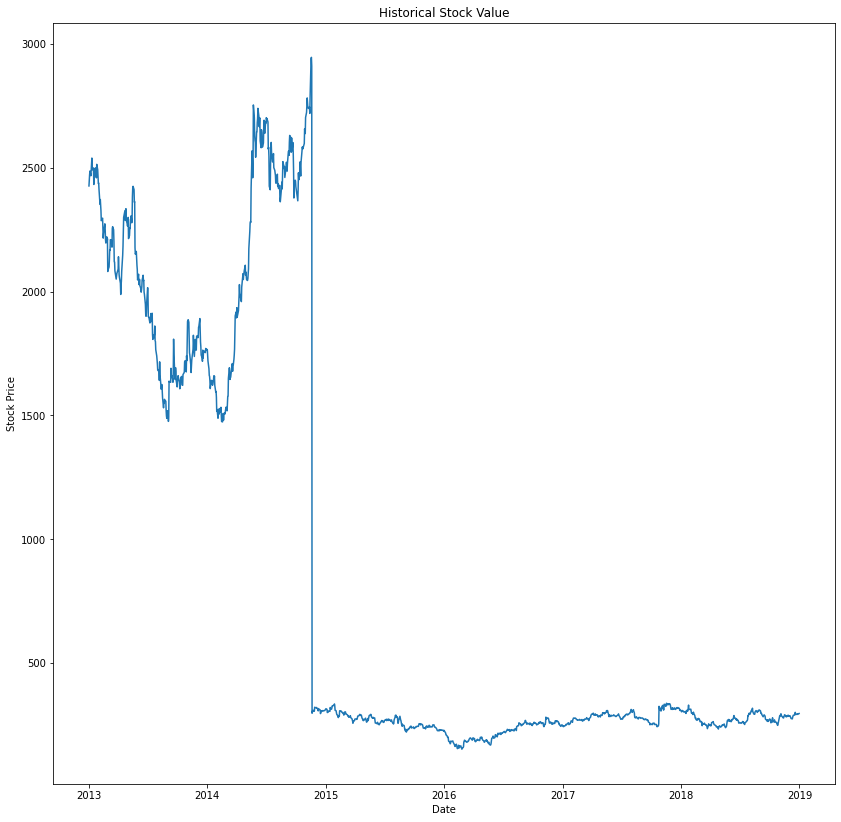

In [12]:
#Visualizing the fetched data
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [13]:
#Data Preprocessing
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [14]:
#Data Preprocessing
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
#Defining the LSTM Recurrent Model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [17]:
#Compiling and fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
45/45 [==============================] - 25s 15ms/step - loss: 0.0480
Epoch 2/15
45/45 [==============================] - 1s 14ms/step - loss: 0.0077
Epoch 3/15
45/45 [==============================] - 1s 14ms/step - loss: 0.0064
Epoch 4/15
45/45 [==============================] - 1s 14ms/step - loss: 0.0078
Epoch 5/15
45/45 [==============================] - 1s 14ms/step - loss: 0.0079
Epoch 6/15
45/45 [==============================] - 1s 14ms/step - loss: 0.0070
Epoch 7/15
45/45 [==============================] - 1s 14ms/step - loss: 0.0050
Epoch 8/15
45/45 [==============================] - 1s 14ms/step - loss: 0.0047
Epoch 9/15
45/45 [==============================] - 1s 14ms/step - loss: 0.0055
Epoch 10/15
45/45 [==============================] - 1s 14ms/step - loss: 0.0070
Epoch 11/15
45/45 [==============================] - 1s 14ms/step - loss: 0.0062
Epoch 12/15
45/45 [==============================] - 1s 14ms/step - loss: 0.0065
Epoch 13/15
45/45 [=================

In [18]:
#Fetching the test data and preprocessing
testdataframe= gh(symbol='SBIN',start=dt.datetime(2019,1,1),end=dt.datetime(2019,9,18))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [19]:
#Making predictions on the test data
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

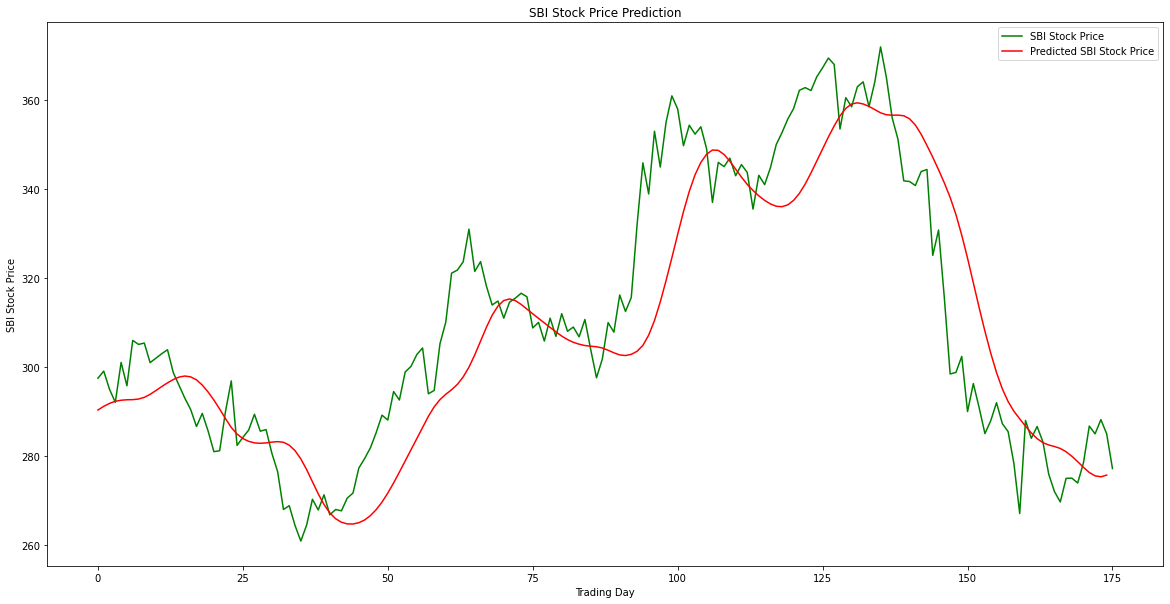

In [20]:
#Visualizing the prediction
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()